# Text Classification Challenge

## Overview

Welcome to the Text Classification Challenge! In this task, you will develop a machine learning model to classify IMDb movie reviews into positive or negative sentiments. The challenge is designed to help you demonstrate your skills in natural language processing (NLP) and your ability to work with state-of-the-art transformer models.

### Problem Statement

The task is to build a text classification model that accurately predicts whether a given movie review expresses a positive or negative sentiment. Sentiment analysis is a critical task in NLP with applications in marketing, customer feedback, social media monitoring, and more. Accurately classifying sentiments can provide valuable insights into customer opinions and help businesses make data-driven decisions.

### Why This Task is Important

Understanding customer sentiment through text data is crucial for businesses and organizations to respond effectively to customer needs and preferences. By automating the sentiment analysis process, companies can efficiently analyze vast amounts of data, identify trends, and make informed strategic decisions. For this challenge, we will use the IMDb dataset, a widely-used benchmark in sentiment analysis, to train and evaluate our model.

## Dataset Description

The dataset used for this challenge is the IMDb movie reviews dataset, which contains 50,000 reviews labeled as either positive or negative. This dataset is balanced, with an equal number of positive and negative reviews, making it ideal for training and evaluating sentiment analysis models.

- **Columns:**
  - `review`: The text of the movie review.
  - `sentiment`: The sentiment label (`positive` or `negative`).

The IMDb dataset provides a real-world scenario where understanding sentiment can offer insights into public opinion about movies, directors, and actors, as well as broader trends in the entertainment industry.

## Approach

Transformers have revolutionized NLP by allowing models to consider the context of a word based on surrounding words, enabling better understanding and performance on various tasks, including sentiment analysis. Their ability to transfer learning from massive datasets and adapt to specific tasks makes them highly effective for text classification.

## Your Task

You are required to implement a transformer-based model for sentiment classification on the IMDb dataset. Follow the steps below to complete the challenge:

1. **Data Exploration and Preprocessing:**
   - Load the dataset and perform exploratory data analysis (EDA) to understand its structure.
   - Preprocess the data by cleaning text, encoding labels, and splitting into training and test sets.

2. **Model Implementation:**
   - Implement a transformer-based model for sentiment classification. You should consider writing Transformer blocks from scratch.
   - Implement data loaders and training loops using a deep learning framework like PyTorch or TensorFlow.

3. **Training and Evaluation:**
   - Train your model and optimize hyperparameters for the best performance.
   - Evaluate the model using appropriate metrics.

4. **Documentation:**
   - Document your approach, experiments, and results.
   - Discuss any challenges faced and propose potential improvements.

5. **Prediction and Inference:**
    - Implement a function that takes a movie review as input and predicts the sentiment (positive or negative).
    - Test the function with custom reviews and display the predicted sentiment.

6. **Model Deployment:**
    - Save the trained model and any other necessary files.
    - Prepare the model for deployment (e.g., using Flask or FastAPI).
    - Prepare a basic front-end interface for the deployed model.

7. **Submission:**
    - Create a GitHub repository for your code.
    - Write a detailed README.md file with instructions on how to train, evaluate, and use the model.
    - Include a summary of your approach and the results in the README file.
    - Your code should be well-documented and reproducible.
    - Your repository should include a notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
    - Apart from the notebook, you should also have all the codes in .py files so that it can be easily integrated with the API.
    - You submission should also include a python script for the API.
    - Your submission should also include a basic front-end for the deployed model.
    - Submit the GitHub repository link.

## Getting Started

To get started, follow the structure provided in this notebook, complete each step, and explore additional techniques to enhance your model's performance. Make sure to document your findings and prepare a comprehensive report on your work.

Good luck, and welcome to RealAI!


# Data Exploration and Preprocessing

Let's start by loading the dataset and performing some exploratory data analysis (EDA) to understand its structure and characteristics.
You can download the dataset from the following link: https://drive.google.com/file/d/1aU7Vv7jgodZ0YFOLY7kmSjrPcDDwtRfU/view?usp=sharing

You should provide all the necessary reasoning and code to support your findings.

Finally, you should apply the required preprocessing steps to prepare the data for training the sentiment classification model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup #Remove HTML tags
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/drive/MyDrive/labProject/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


Text(0.5, 1.0, 'Distribution of Reviews')

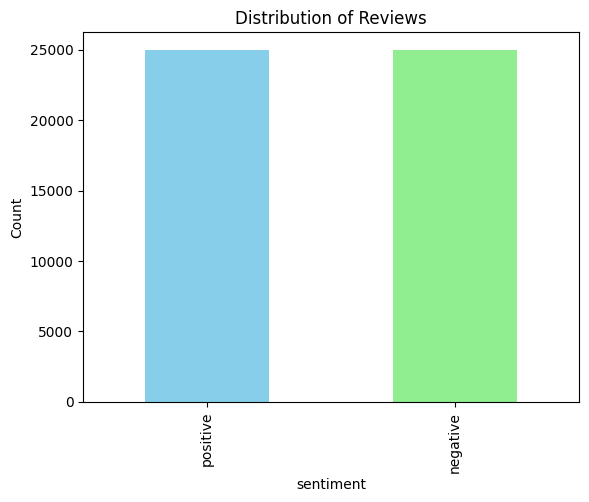

In [ ]:
colors=['skyblue','lightgreen']
df['sentiment'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Distribution of Reviews')

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


==> Both class has an equal number of data

In [ ]:
df_copy=df.copy()

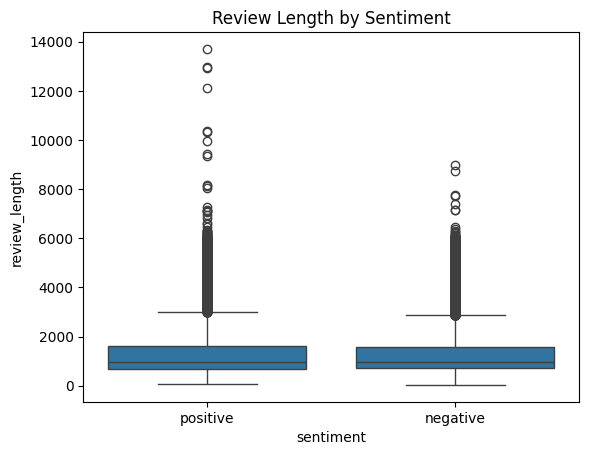

In [ ]:
df_copy['review_length'] = df_copy['review'].str.len()
sns.boxplot(x='sentiment', y='review_length', data=df_copy)
plt.title('Review Length by Sentiment')
plt.show()


In [ ]:
df_copy

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


# **Data preprocessing**
# **Data Cleaning**



*   Remove html tags
*   Converting all text to lowercase.
*   Remove special_characters
*   Remove multiple space
*   Remove stop words





In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def convert_to_lowercase(text):
    return text.lower()

def remove_stop_words(text):
    stop_words=set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words and len(word) > 1])

def reduce_multiple_spaces(text):
    return ' '.join(text.split())

def preprocess_review(text):
    text = remove_html_tags(text)
    text = remove_special_characters(text)
    text = convert_to_lowercase(text)
    text= remove_stop_words(text)
    text=reduce_multiple_spaces(text)
    return text

In [ ]:
df['review'] = df['review'].apply(preprocess_review)


<ipython-input-13-54cd1bb65260>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


Cleaned data

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# **Label Encoding**

In [ ]:
df['sentiment']=df['sentiment'].replace({'positive':1, 'negative':0})
df

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


# **Split Data**

In [ ]:
X= df['review'] #feature
y= df['sentiment'] #label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

40000
10000


# Model Implementation

You are required to implement a transformer-based model for sentiment classification from scratch. You can use libraries like PyTorch or TensorFlow to implement the model architecture and training process.

You should include the architecture figure of the proposed model and provide a detailed explanation of why you chose this architecture.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim.lr_scheduler import StepLR

In [ ]:


# Custom Dataset class
class IMDBDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Transformer-based model
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )['pooler_output']
        output = self.drop(pooled_output)
        return self.out(output)

# Hyperparameters
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 3
LR = 1e-5

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare dataset and dataloaders
train_dataset = IMDBDataset(X_train.tolist(), y_train.tolist(), tokenizer, MAX_LEN)
test_dataset = IMDBDataset(X_test.tolist(), y_test.tolist(), tokenizer, MAX_LEN)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentimentClassifier(n_classes=2).to(device)
#optimizer = optim.Adam(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)

loss_fn = nn.CrossEntropyLoss().to(device)

# Training loop
def train_epoch(model, dataloader, loss_fn, optimizer, device):
    model = model.train()
    losses = []
    correct_predictions = 0

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)
        correct_predictions += torch.sum(torch.argmax(outputs, dim=1) == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / len(dataloader.dataset), np.mean(losses)

# Evaluation loop
def eval_model(model, dataloader, loss_fn, device):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)
            correct_predictions += torch.sum(torch.argmax(outputs, dim=1) == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(dataloader.dataset), np.mean(losses)
scheduler = StepLR(optimizer, step_size=1, gamma=0.9)
# Training the model
for epoch in range(EPOCHS):
    train_acc, train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)
    val_acc, val_loss = eval_model(model, test_dataloader, loss_fn, device)

    print(f'Epoch {epoch+1}/{EPOCHS}')
    print(f'Train loss: {train_loss}, accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, accuracy: {val_acc}')
    scheduler.step()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/3
Train loss: 0.32464552347138526, accuracy: 0.8570500000000001
Validation loss: 0.2633835978150368, accuracy: 0.8879
Epoch 2/3
Train loss: 0.20390789793543518, accuracy: 0.919
Validation loss: 0.254663277566433, accuracy: 0.8966000000000001
Epoch 3/3
Train loss: 0.12238368396479636, accuracy: 0.955725
Validation loss: 0.297796485664323, accuracy: 0.8941


In [ ]:
def predict_sentiment(text, model, tokenizer, max_len, device):
    model = model.eval()

    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(output, dim=1).cpu().numpy()[0]

    return "positive" if prediction == 1 else "negative"

# Example usage
sample_review = "This movie was boring!."
sentiment = predict_sentiment(sample_review, model, tokenizer, MAX_LEN, device)
print(f'Sentiment: {sentiment}')


Sentiment: negative


In [ ]:
from sklearn.metrics import classification_report

# Collect all predictions and true labels
all_preds = []
all_labels = []

for batch in test_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['label'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

# Print the classification report
print(classification_report(all_labels, all_preds, target_names=['negative', 'positive']))


              precision    recall  f1-score   support

    negative       0.88      0.91      0.89      4961
    positive       0.91      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



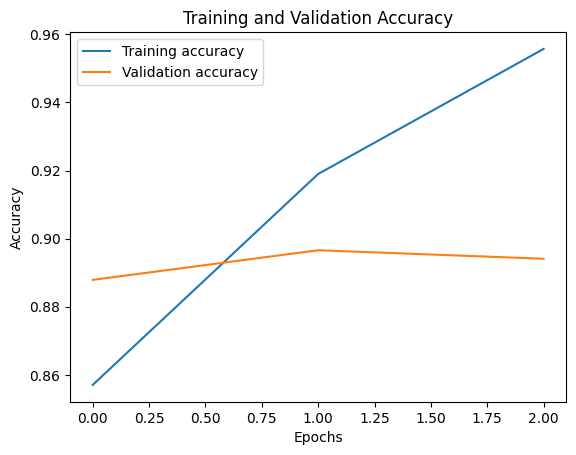

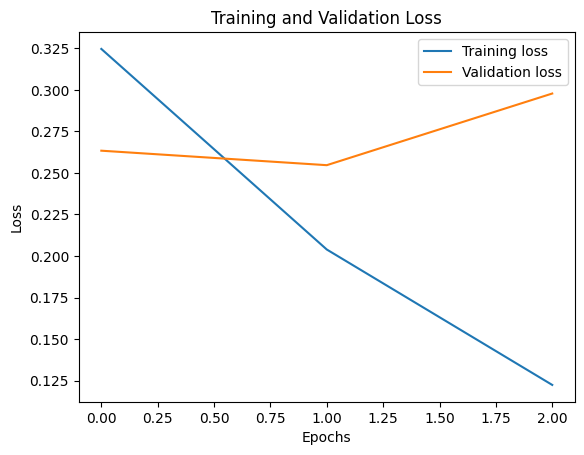

In [ ]:
import matplotlib.pyplot as plt
train_accuracies = [0.85705, 0.919, 0.955725]
val_accuracies = [0.8879,0.8966, 0.8941]
train_losses = [0.324645,0.20390,0.122383]
val_losses = [0.2633835978150368, 0.254663277566433,0.297796485664323]

def plot_history(train_values, val_values, name):
    plt.plot(train_values, label=f'Training {name}')
    plt.plot(val_values, label=f'Validation {name}')
    plt.xlabel("Epochs")
    plt.ylabel(name.capitalize())
    plt.legend()
    plt.title(f'Training and Validation {name.capitalize()}')
    plt.show()

# Plotting accuracy
plot_history(train_accuracies, val_accuracies, "accuracy")
plot_history(train_losses,val_losses,"loss")